# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Human Gait Treadmill Data (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) ##

the time series represents the posterior-anterior direction force detected by the sensor on a split-belt treadmill, which operates at four different running speeds: 0.6, 0.7, 0.8, and 0.9 m/s

m = 100 (one cycle in the data)

The results for d=1 are the same as in the Robust Time Series Chain Discovery with Incremental Nearest Neighbors.

In [2]:
# Parameter
use_case = "chains"
data_name = "humangaittreadmill"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "ts")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [3]:
# Hyperparameter
target_w = 100
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = True # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
# calculate:
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=100, m=None, offset=False, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=100, m=100, d=1, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=101, m=51, d=2, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=100, m=34, d=3, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=101, m=26, d=4, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=101, m=21, d=5, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=97, m=17, d=6, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=99, m=15, d=7, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=97, m=13, d=8, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=100, m=12, d=9, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=101, m=11, d=10, offset=0, groundtruthD1=True, nonoverlapping=True


Visualizing Experiment: target_w=100, m=None, offset=False, groundtruthD1=True, nonoverlapping=True
chain for d=1, m=100, w=100: [  84 1095 2981 3121 4552 4839]
chain for d=2, m=51, w=101: [  83 1094 2980 3120 4551 4838]
chain for d=3, m=34, w=100: [   84  1095  2981  3121  4552  4839 16472]
chain for d=4, m=26, w=101: [   84  1095  2981  3121  4552  4839 16472]
chain for d=5, m=21, w=101: [ 8855 15379 16110 17701 18174 20325 22022]
chain for d=6, m=17, w=97: [  74 1085 1952 2243 4542 4829]
chain for d=7, m=15, w=99: [  84 1095 2981 3121 4552 4839]
chain for d=8, m=13, w=97: [   83  1094  3262  4551  4838 16472]
chain for d=9, m=12, w=100: [ 1909  5793  8803 13004 15079 23103 23333]
chain for d=10, m=11, w=101: [  85 1096 2981 3121 4552 4839]


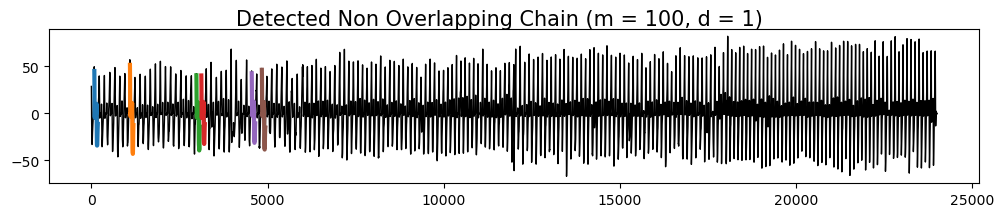

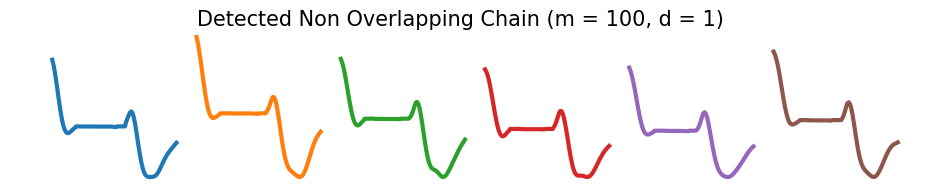

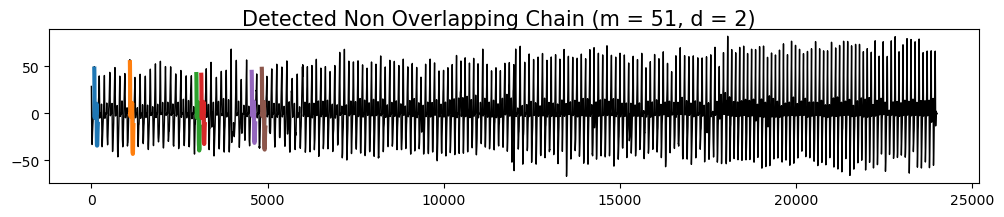

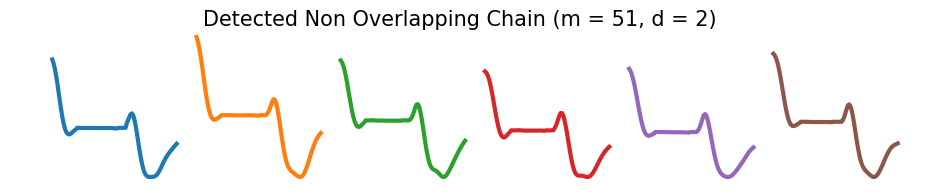

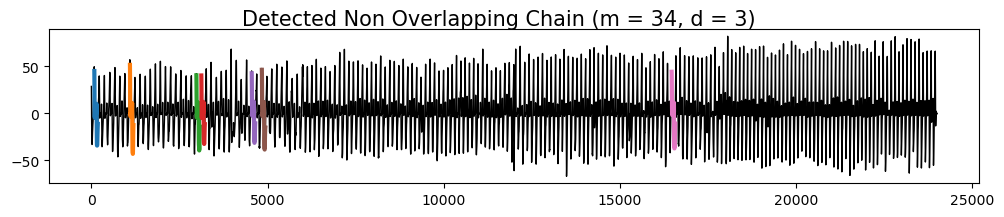

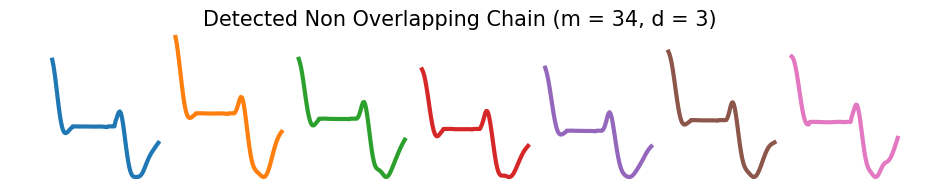

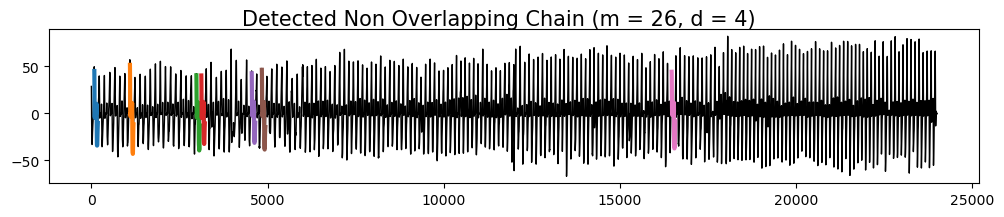

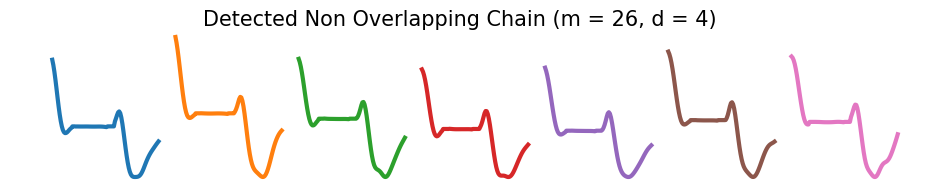

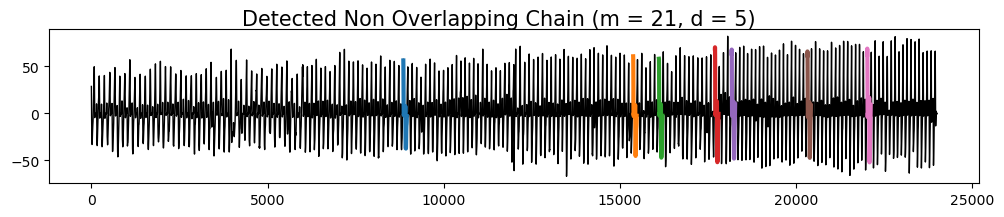

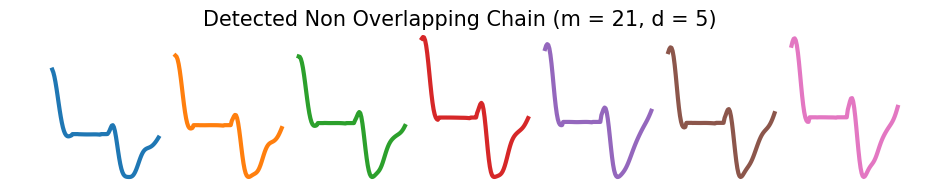

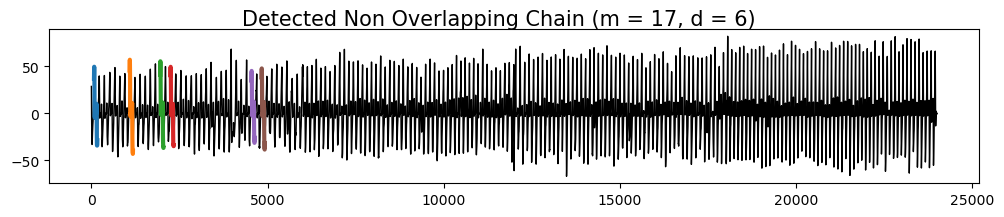

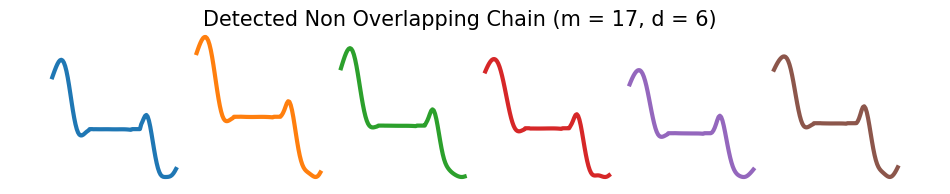

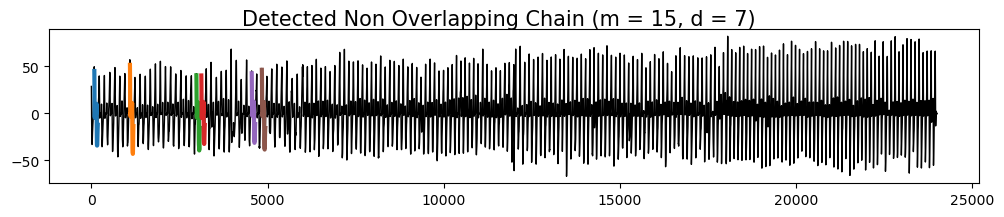

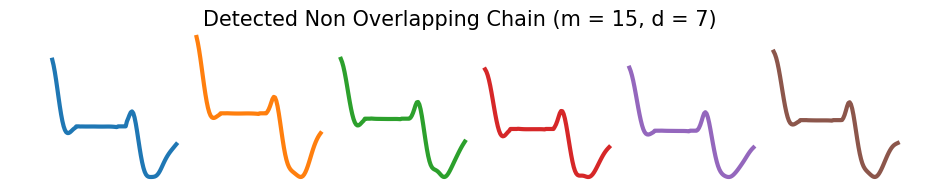

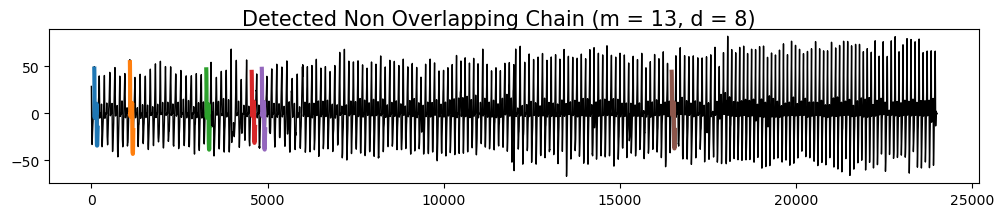

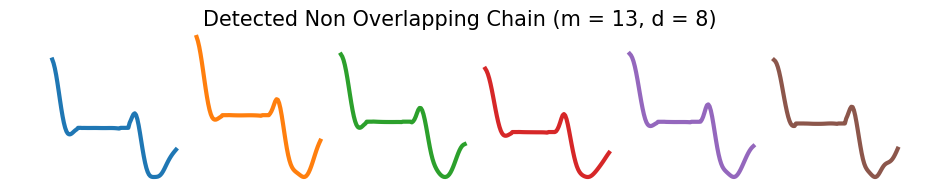

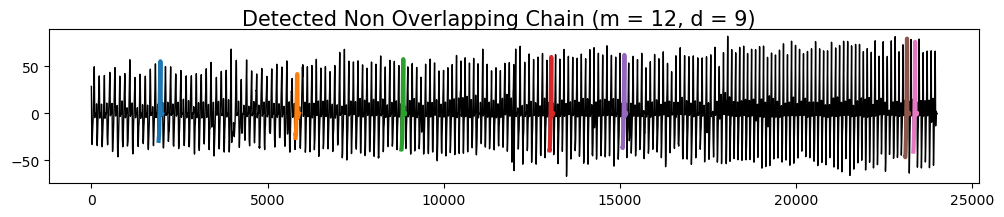

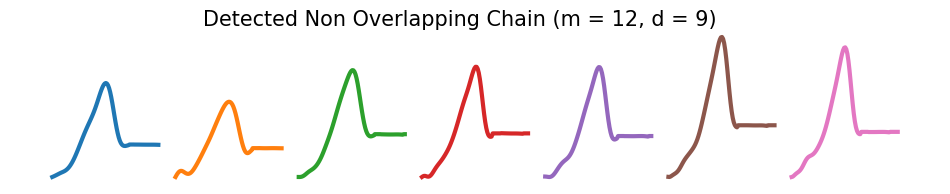

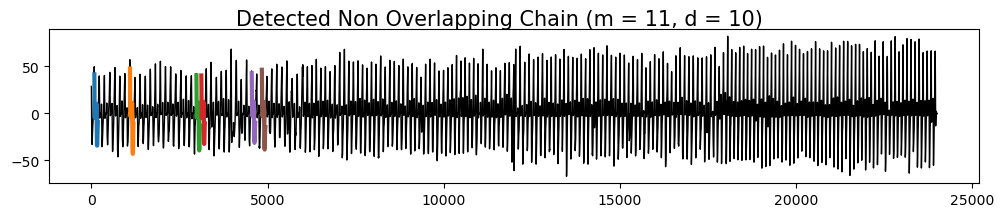

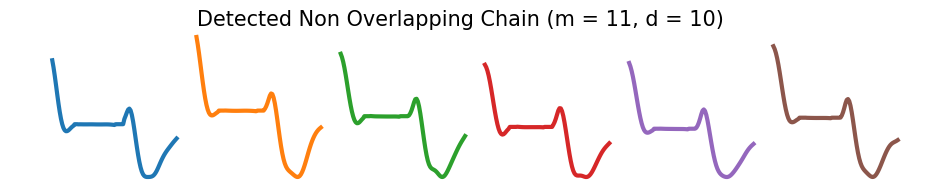

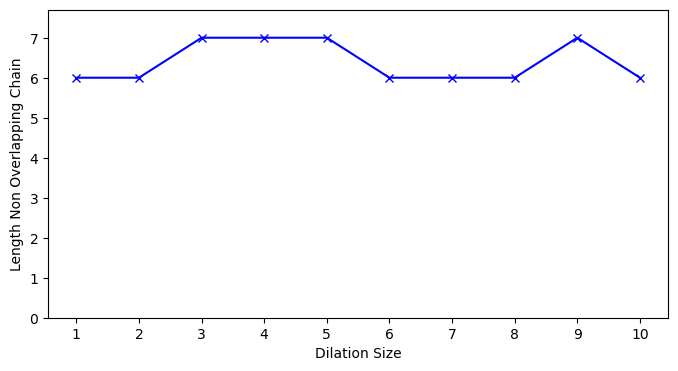

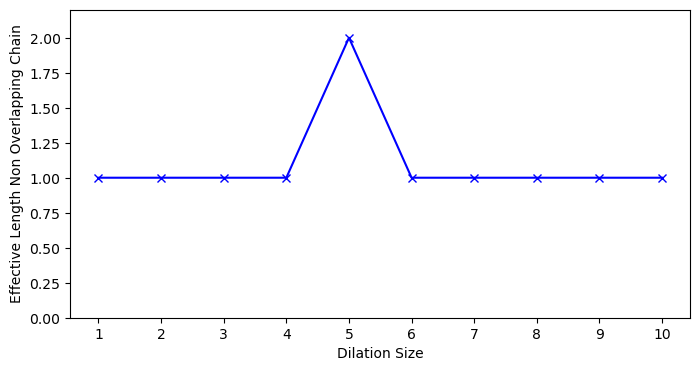

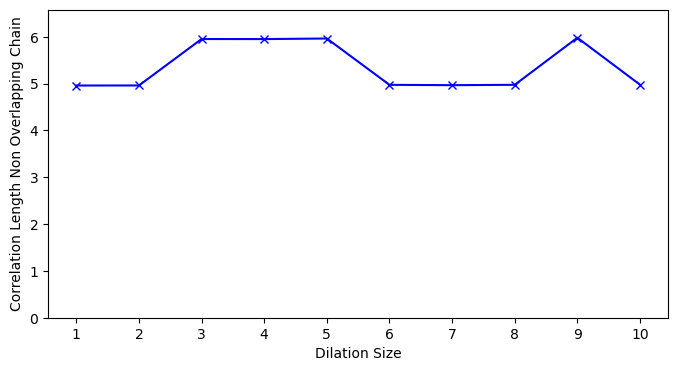

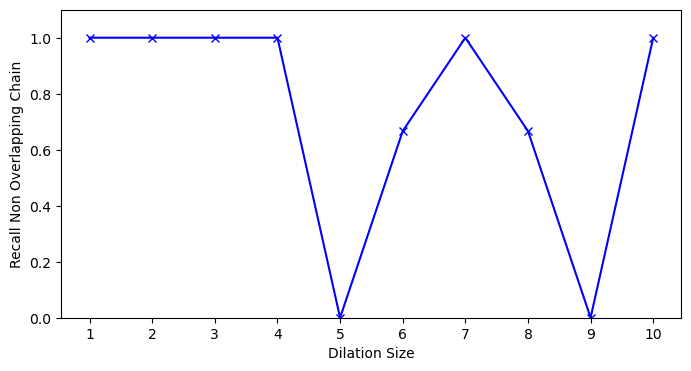

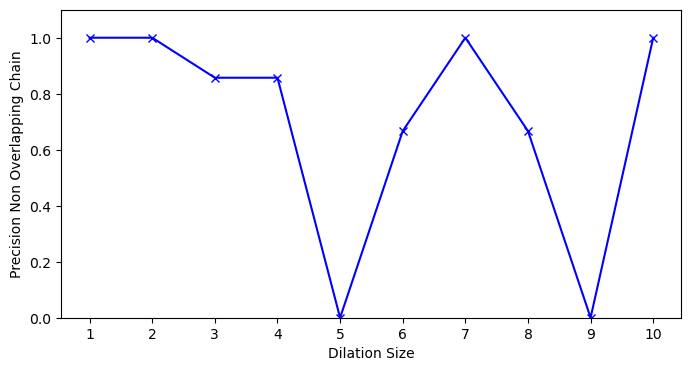

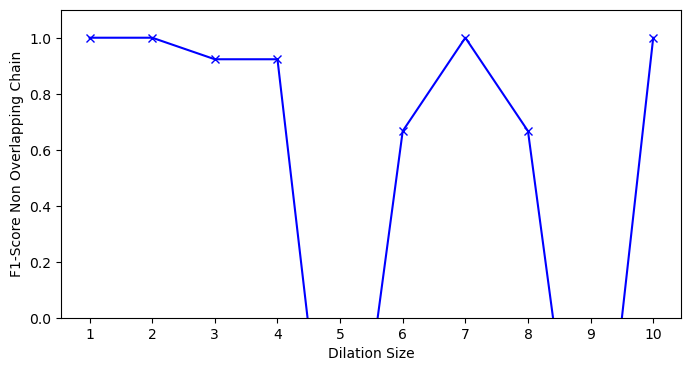

In [5]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)